In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
df = pd.read_csv('deflategate.csv')
df

Team  Blakeman  Prioleau
0   Patriots     11.50     11.80
1   Patriots     10.85     11.20
2   Patriots     11.15     11.50
3   Patriots     10.70     11.00
4   Patriots     11.10     11.45
5   Patriots     11.60     11.95
6   Patriots     11.85     12.30
7   Patriots     11.10     11.55
8   Patriots     10.95     11.35
9   Patriots     10.50     10.90
10  Patriots     10.90     11.35
11     Colts     12.70     12.35
12     Colts     12.75     12.30
13     Colts     12.50     12.95
14     Colts     12.55     12.15

In [50]:
df['pressure'] = (df['Blakeman']+df['Prioleau'])/2
df.drop(columns=['Blakeman','Prioleau'],inplace=True)
df

Team  pressure
0   Patriots    11.650
1   Patriots    11.025
2   Patriots    11.325
3   Patriots    10.850
4   Patriots    11.275
5   Patriots    11.775
6   Patriots    12.075
7   Patriots    11.325
8   Patriots    11.150
9   Patriots    10.700
10  Patriots    11.125
11     Colts    12.525
12     Colts    12.525
13     Colts    12.725
14     Colts    12.350

In [51]:
patriots_df = df[df['Team'] == 'Patriots']
patriots_df 

Team  pressure
0   Patriots    11.650
1   Patriots    11.025
2   Patriots    11.325
3   Patriots    10.850
4   Patriots    11.275
5   Patriots    11.775
6   Patriots    12.075
7   Patriots    11.325
8   Patriots    11.150
9   Patriots    10.700
10  Patriots    11.125

In [52]:
colts_df = df[df['Team'] == 'Colts']
colts_df

Team  pressure
11  Colts    12.525
12  Colts    12.525
13  Colts    12.725
14  Colts    12.350

In [53]:
patriots_df['diff'] = 12.5-patriots_df['pressure']
patriots_df.drop(columns=['pressure'])

/var/folders/21/yhy2dhmx219b7cbcq243hmwc0000gn/T/ipykernel_40469/1405249625.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patriots_df['diff'] = 12.5-patriots_df['pressure']


Team   diff
0   Patriots  0.850
1   Patriots  1.475
2   Patriots  1.175
3   Patriots  1.650
4   Patriots  1.225
5   Patriots  0.725
6   Patriots  0.425
7   Patriots  1.175
8   Patriots  1.350
9   Patriots  1.800
10  Patriots  1.375

In [54]:
colts_df['diff'] = 13-colts_df['pressure']
colts_df.drop(columns=['pressure'])

/var/folders/21/yhy2dhmx219b7cbcq243hmwc0000gn/T/ipykernel_40469/4026769585.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  colts_df['diff'] = 13-colts_df['pressure']


Team   diff
11  Colts  0.475
12  Colts  0.475
13  Colts  0.275
14  Colts  0.650

In [55]:
mean_patriots = patriots_df['diff'].mean()
mean_colts = colts_df['diff'].mean()
print(mean_patriots)
print(mean_colts)

1.202272727272728
0.46875


This observed difference has the difference between the mean of the drop of the ball patriots and the mean of the drop of the ball of the  colts.It is also considered to be the test statistic

In [56]:
observed_diff = mean_patriots - mean_colts # test statistic
observed_diff

0.733522727272728

Here we need to perform the random permutation test

In [57]:
diff_arr = []

In [58]:
for i in range(7000):
    shuffled = df.sample(15)
    shuffled_pressure = shuffled['pressure']
    original_and_shuffled = df.assign(shuff_pressure = shuffled_pressure.values)
    original_and_shuffled_patriots = original_and_shuffled[original_and_shuffled['Team']=='Patriots']
    original_and_shuffled_colts = original_and_shuffled[original_and_shuffled['Team']=='Colts']
    original_and_shuffled_patriots['diff'] = 12.5 - original_and_shuffled['shuff_pressure']
    original_and_shuffled_colts['diff'] = 13 - original_and_shuffled['shuff_pressure']
    mean_patriots_diff = original_and_shuffled_patriots['diff'].mean()
    mean_colts_diff = original_and_shuffled_colts['diff'].mean()
    differ = (mean_patriots_diff - mean_colts_diff)
    diff_arr.append(differ)
print(diff_arr)

/var/folders/21/yhy2dhmx219b7cbcq243hmwc0000gn/T/ipykernel_40469/638099166.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original_and_shuffled_patriots['diff'] = 12.5 - original_and_shuffled['shuff_pressure']
/var/folders/21/yhy2dhmx219b7cbcq243hmwc0000gn/T/ipykernel_40469/638099166.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original_and_shuffled_colts['diff'] = 13 - original_and_shuffled['shuff_pressure']
/var/folders/21/yhy2dhmx219b7cbcq243hmwc0000gn/T/ipykernel_40469/638099166.py:7: Settin

[0.026136363636362736, -0.510795454545455, -0.3318181818181817, -0.9369318181818181, -1.0732954545454545, -1.1840909090909095, -0.23806818181818157, -0.24659090909090897, -0.570454545454545, -0.2551136363636357, -0.6556818181818184, -0.7238636363636363, 0.08579545454545512, -0.04204545454545394, -0.6045454545454553, -0.8857954545454549, -0.4340909090909085, -0.3147727272727274, -0.25511363636363626, -0.11022727272727306, -0.536363636363636, -0.5193181818181825, -0.2551136363636357, -0.5107954545454539, -0.1357954545454546, -0.7494318181818185, -0.5193181818181819, -1.0221590909090907, 0.11136363636363611, -0.19545454545454521, 0.31590909090909114, -0.5619318181818183, 0.017613636363636553, -0.8857954545454544, -0.6215909090909087, -0.3999999999999996, -0.4681818181818175, -0.22102272727272676, -0.5278409090909086, -0.06761363636363604, 0.2647727272727274, -0.6301136363636368, 0.23068181818181777, -0.8687500000000002, -0.9880681818181825, -0.8261363636363638, -0.28068181818181726, -0.77

In [59]:
diff_arr = np.array(diff_arr)
diff_arr

array([ 0.02613636, -0.51079545, -0.33181818, ..., -0.45113636,
        0.06875   , -0.29772727])

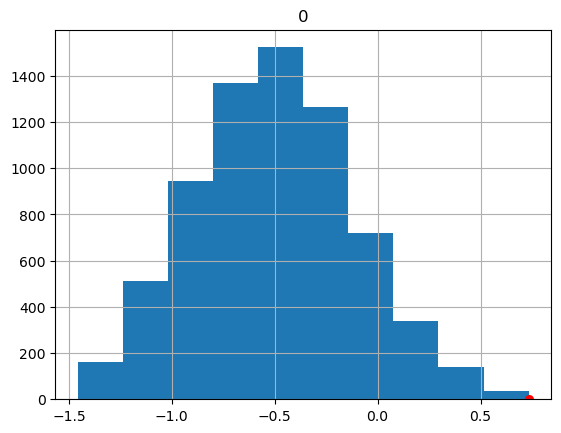

In [60]:
diff_arr = pd.DataFrame(diff_arr)
diff_arr.hist()
plt.scatter(observed_diff,0,color = 'red',s = 30)
plt.show()

In [61]:
p_value = np.count_nonzero(observed_diff<=diff_arr)/diff_arr.size
p_value

0.00042857142857142855

In [62]:
np.count_nonzero(observed_diff<=diff_arr)

3

In [63]:
observed_diff <= diff_arr

0
0     False
1     False
2     False
3     False
4     False
...     ...
6995  False
6996  False
6997  False
6998  False
6999  False

[7000 rows x 1 columns]